In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Used_cars.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [5]:
df["price"] = (
    df["price"]
    .str.replace("$","",regex=False)
    .str.replace(",","",regex = False)
    .astype(float)
)

df["price"] = pd.to_numeric(df["price"],errors="coerce")
df = df.dropna(subset = ["price"])

In [6]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


In [7]:
df.drop("model",axis=1, inplace=True)

In [8]:
df["Car_age"] = 2025 - df["model_year"]
df.drop("model_year",axis = 1,inplace=True)

In [9]:
df["milage"] = (
    df["milage"]
    .str.replace(",","",regex=True)
    .str.extract(r"(\d+)")
    .astype(float)
)

In [10]:
df["engine"] = df["engine"].astype(str)

df["engine"] = (
    df["engine"]
    .str.extract(r"(\d+\.\d+)L")
    .astype(float)
)


In [11]:
df.drop(["ext_col", "int_col"], axis=1, inplace=True)

In [12]:
df["accident"] = df["accident"].fillna("Unknown")
df["Accident"] = df["accident"].apply(
    lambda x : 0 if "None" in x else 1
)

df.drop("accident", axis=1, inplace=True)

In [13]:
df.drop("clean_title",axis = 1 , inplace = True,errors="ignore")

In [14]:
import matplotlib.pyplot as plt

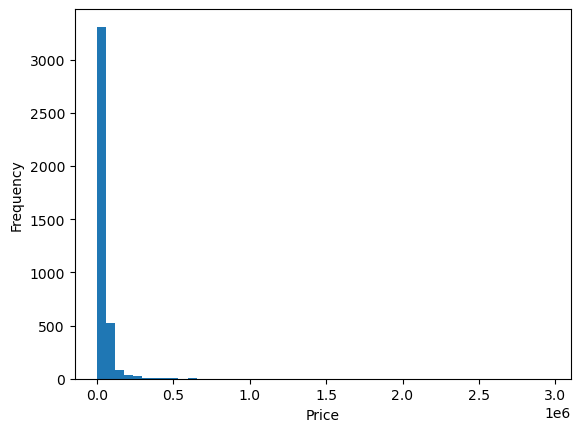

In [15]:
plt.hist(df["price"] ,bins = 50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [16]:
x = df.drop("price",axis = 1) # features

In [17]:
y = np.log1p(df["price"]) # label 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train , x_test , y_train , y_test = train_test_split(
    x,y, test_size=0.2 , random_state=42
)

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3207 entries, 2473 to 3174
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3207 non-null   object 
 1   milage        3207 non-null   float64
 2   fuel_type     3080 non-null   object 
 3   engine        2903 non-null   float64
 4   transmission  3207 non-null   object 
 5   Car_age       3207 non-null   int64  
 6   Accident      3207 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 200.4+ KB


In [21]:
num_attributes = x_train.select_dtypes(include=(np.number)).columns

In [22]:
cat_attributes = x_train.select_dtypes(exclude=(np.number)).columns

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.impute import SimpleImputer

In [24]:
num_pipeline = Pipeline([
    ("imputer" , SimpleImputer(strategy="mean")),
    ("scaler",StandardScaler())
])

In [25]:
cat_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="constant",fill_value="Unknown")),
    ("OHE",OneHotEncoder(
        handle_unknown='ignore'
    ))
])

In [26]:
preprocessor = ColumnTransformer([
    ("num",num_pipeline,num_attributes),
    ("cat",cat_pipeline,cat_attributes)
])

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [28]:
LR_model = Pipeline([
    ("preprocessor",preprocessor),
    ("model", LinearRegression())
])

In [29]:
RF_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model",RandomForestRegressor(
        n_estimators=200,
        max_depth= None,
        random_state=42
    ))
])

In [30]:
LR_model.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
RF_model.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
from sklearn.metrics import r2_score , mean_absolute_error , root_mean_squared_error

In [33]:
y_pred_LR = LR_model.predict(x_test)
y_pred_RF = RF_model.predict(x_test)

In [34]:
results = {
    "LinearRegression " : {
        "R2_score : " :  r2_score(y_test,y_pred_LR),
        "mean_absolute_error: " :  mean_absolute_error(y_test,y_pred_LR),
        "RMSE: " :  root_mean_squared_error(y_test,y_pred_LR)
    },

    "RandomForest " : {
        "R2_score : " :  r2_score(y_test,y_pred_RF),
        "mean_absolute_error: " :  mean_absolute_error(y_test,y_pred_RF),
        "RMSE: " :  root_mean_squared_error(y_test,y_pred_RF)
    } 
}


In [35]:
results

{'LinearRegression ': {'R2_score : ': 0.7480332414450936,
  'mean_absolute_error: ': 0.28245106274941584,
  'RMSE: ': 0.4429469204544678},
 'RandomForest ': {'R2_score : ': 0.7847862301472133,
  'mean_absolute_error: ': 0.2591463662489283,
  'RMSE: ': 0.4093691296886205}}